# Question 1 - Regression Analysis with Automobile Miles Per Gallon Dataset

The auto-mpg dataset is a dataset which gives mileage of a vehicle in mpg(miles per gallon) based on several parameters.   

### Columns are:  
#### Input Features 
**cylinders**: number of cylinders in vehicle     
**displacement**: continuous variable  
**horsepower**: power of vehicle     
**weight**: weight of vehicle   
**acceleration**: acceleration of vehicle    
**model year**: year of vehicle model   
**origin**: origin of model  1 = Arizona 2 = Ohio  3 = Washington 

#### Output
**mpg**: Miles per gallon

## Tasks
1. Perform Linear Regression to predict the miles per gallon based on **relevant features**. 

## Mark Distribution
1. Are there any missing values, or values which are not numbers in any of the columns? Justify.
2. What is the minimum, maximum and standard deviation of the weight column for all the models in the 80s?
3. Plot the average horsepower & MPG of every year. Can you comment on the graph?
4. If customer is looking for a higher mileage vehicle, how many cylinder vehicle you will recommend without considering any other parameters?
5. Can you find out the average MPG rating for every origin state?

6. **Important** Design a final mpg value predictor model for entire dataset, try to increase speed of the model by considering only important input features. (Minimum acceptable accuracy is 70%) 

7. In 1996, A new vehicle model Nissan was manufactured in Ohio. Company published following specs - Cylinder=6, displacement= 300, horsepower=130, weight=4000, acceleration=17 but refused to comment anything on mpg rating, can you predict what could be the mpg rating based on your model?

8. A washington based business anlytics company obtained same dataset, and decided to create their own custom model for Washington state vehicles. What is mpg prediction for feature values same as Question 7? 

In [1]:
import pandas as pd
df = pd.read_csv('./data/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [39]:
#Are there any missing values, or values which are not numbers in any of the columns? Justify.
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [85]:
df=df[df['horsepower']!='?']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1
9,15.0,8,390.0,190,3850,8.5,70,1


In [76]:
#What is the minimum, maximum and standard deviation of the weight column for all the models in the 80s
modelyear_filter=df[df['model year']>=80]
grouped_data=modelyear_filter.groupby(['model year'])
for name,group in grouped_data:
    print("name:%s, Count:%s"%(name,group['weight'].std()))

name:80, Count:432.23549102825126
name:81, Count:533.6005013808473
name:82, Count:354.2767128210826


In [88]:
#Plot the average horsepower & MPG of every year. Can you comment on the graph?
avg_horse=[]
avg_mpg=[]
grouped_data=df.groupby(['model year'])
for name,group in grouped_data:
    avg_horse.append(group['horsepower'].mean())
    avg_mpg.append(group['mpg'].mean())
print(avg_horse)    


[4.48845345345311e+74, 3.2929448152040775e+65, 3.42162467363042e+68, 4.3787536284287554e+105, 3.657696179925606e+60, 3.170190907233817e+71, 2.5535082303353384e+82, 2.4573534536232536e+67, 1.3518130722528168e+87, 3.995134141728625e+68, 2.83729873736633e+55, 3.0303289673066593e+60, 2.9629628616364248e+60]


In [37]:
#If customer is looking for a higher mileage vehicle, how many cylinder vehicle you will recommend without considering any other parameters?
df[df['mpg']>30]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
53,31.0,4,71.0,65,1773,19.0,71,3
54,35.0,4,72.0,69,1613,18.0,71,3
129,31.0,4,79.0,67,1950,19.0,74,3
131,32.0,4,71.0,65,1836,21.0,74,3
144,31.0,4,76.0,52,1649,16.5,74,3
145,32.0,4,83.0,61,2003,19.0,74,3
151,31.0,4,79.0,67,2000,16.0,74,2
181,33.0,4,91.0,53,1795,17.5,75,3
198,33.0,4,91.0,53,1795,17.4,76,3
204,32.0,4,85.0,70,1990,17.0,76,3


In [73]:
#Can you find out the average MPG rating for every origin state?
grouped_data=modelyear_filter.groupby(['origin'])
for name,group in grouped_data:
    print("name:%s, Count:%s"%(name,group['mpg'].mean()))

name:1, Count:28.2075
name:2, Count:36.12666666666667
name:3, Count:34.40294117647059


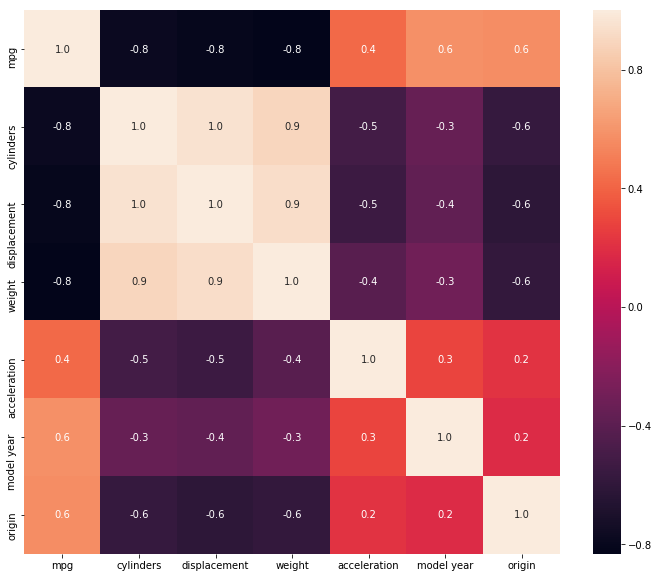

In [84]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))#figue size of heatmap

sb.heatmap(df.corr(),annot=True,fmt='.1f')#annot=True gives values in decimal points,fmt is the type of values inside heatmap